In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Nadam
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import cv2
import os, errno
from tqdm import tqdm_notebook, tqdm
from jupyterthemes import jtplot
jtplot.style(theme="grade3", grid=False)
pd.set_option("display.max_colwidth", 1200)
plt.rc("ytick", labelsize=20)
plt.rc("xtick", labelsize=20)

In [3]:
# C://Users/irie9/Python/

(646, 646, 3)


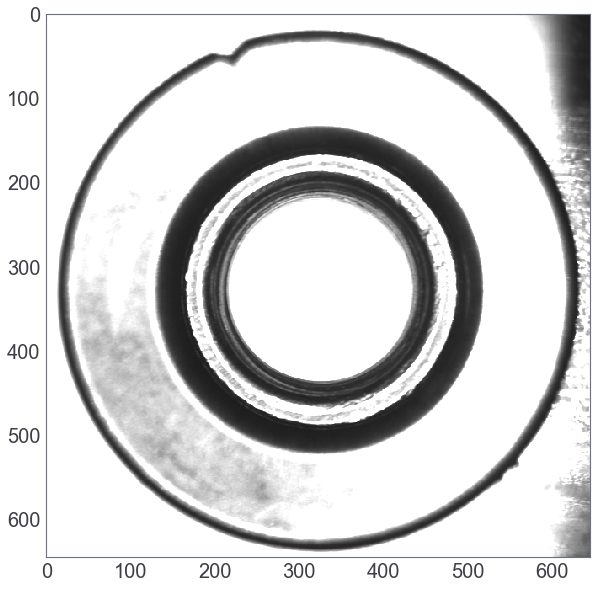

In [4]:
sample_image = cv2.imread("C://Users/irie9/Python/c_nasa/bad_0.png")
print(sample_image.shape)
plt.figure(figsize=(10, 10))
plt.imshow(sample_image[:, :, ::-1])

In [5]:
os.getcwd()

'C:\\Users\\irie9\\Python'

# Read and Pre-process Image

In [6]:
import glob
images = glob.glob("C://Users/irie9/Python/c_nasa/*.png")
X = []
for i in images :
    X.append((cv2.imread(i, 0)))
norm = []
for i in range(len(X)) :
    norm.append(cv2.resize(X[i], (320, 320), cv2.INTER_AREA)/255)
X = norm

In [7]:
# import glob
# images = glob.glob("C:\\Users\\irie9\\Python\\c_nasa\\*.png")
# X = []
# for i in images :
#     X.append((cv2.resize(cv2.imread(i, 0), (384, 384), cv2.INTER_AREA)))
# # X = []
# # for i in images :
# #     X.append(cv2.imread(i))

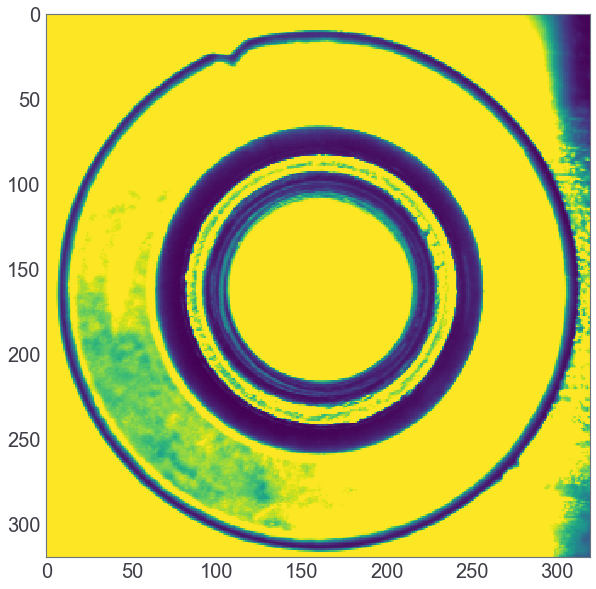

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(X[0])

In [9]:
# norm = []
# for i in range(len(X)) :
#     norm.append(X[i]/255)
# X = norm

In [10]:
path = "C://Users/irie9/Python/c_nasa"
labels = []
file_list = os.listdir(path)
for item in file_list :
    if item.find("good_") :
        labels.append(0)
    elif item.find("bad_") :
        labels.append(1)
    else:
        labels.append(-1)

In [11]:
nb_classes = int(np.array(labels).max()+1)
nb_classes
y = np_utils.to_categorical(labels, nb_classes)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=.2, random_state=42)

In [13]:
X_train = X_train[:, :, :, np.newaxis]
X_train.shape
X_test = X_test[:, :, :, np.newaxis]

In [14]:
X_train.shape

(1140, 320, 320, 1)

# Model

In [15]:
IMG_CHANNELS = 1 ## gray image
IMG_ROWS = 320
IMG_COLS = 320

In [16]:
BATCH_SIZE = 32
NB_EPOCH = 20
NB_CLASSES = 2
VERBOSE = 1
VALIDATION_SPLIT = .2
OPTIM = Adam(lr=.00001)

In [17]:
import keras

In [18]:
model = Sequential()

model.add(Conv2D(1, (3, 3), padding="same", input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(10, (3, 3), padding="same"))
model.add(Activation("elu"))
model.add(Conv2D(10, (3, 3)))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(512, kernel_initializer="he_normal"))
model.add(Activation("elu"))
model.add(Dropout(.5))

model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))
keras.regularizers.l1_l2(l1=.01, l2=.01)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 320, 320, 1)       10        
_________________________________________________________________
activation_1 (Activation)    (None, 320, 320, 1)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 160, 1)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 160, 160, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 160, 10)      100       
_________________________________________________________________
activation_2 (Activation)    (None, 160, 160, 10)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 158, 158, 10)      910       
__________

In [19]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIM,
             metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                   epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
                   verbose=VERBOSE)
print("Testing...")
score = model.evaluate(X_test, y_test,
                      batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])  
print("Test accuracy:", score[1])

Train on 912 samples, validate on 228 samples
Epoch 1/20
912/912 [==============================] - ETA: 1:56 - loss: 0.7706 - acc: 0.281 - ETA: 1:21 - loss: 0.7142 - acc: 0.468 - ETA: 1:07 - loss: 0.6884 - acc: 0.541 - ETA: 59s - loss: 0.7046 - acc: 0.570 - ETA: 53s - loss: 0.7014 - acc: 0.58 - ETA: 48s - loss: 0.6866 - acc: 0.60 - ETA: 45s - loss: 0.6845 - acc: 0.61 - ETA: 42s - loss: 0.6781 - acc: 0.62 - ETA: 39s - loss: 0.6753 - acc: 0.61 - ETA: 37s - loss: 0.6712 - acc: 0.61 - ETA: 34s - loss: 0.6759 - acc: 0.59 - ETA: 32s - loss: 0.6729 - acc: 0.60 - ETA: 29s - loss: 0.6647 - acc: 0.61 - ETA: 27s - loss: 0.6673 - acc: 0.60 - ETA: 25s - loss: 0.6739 - acc: 0.60 - ETA: 23s - loss: 0.6774 - acc: 0.60 - ETA: 21s - loss: 0.6802 - acc: 0.60 - ETA: 19s - loss: 0.6829 - acc: 0.60 - ETA: 17s - loss: 0.6794 - acc: 0.60 - ETA: 15s - loss: 0.6764 - acc: 0.60 - ETA: 13s - loss: 0.6751 - acc: 0.61 - ETA: 11s - loss: 0.6684 - acc: 0.62 - ETA: 10s - loss: 0.6640 - acc: 0.62 - ETA: 8s - loss: 0.6

912/912 [==============================] - ETA: 43s - loss: 0.4182 - acc: 0.81 - ETA: 42s - loss: 0.4547 - acc: 0.75 - ETA: 41s - loss: 0.4639 - acc: 0.76 - ETA: 39s - loss: 0.4686 - acc: 0.74 - ETA: 37s - loss: 0.4736 - acc: 0.75 - ETA: 36s - loss: 0.4626 - acc: 0.78 - ETA: 34s - loss: 0.4604 - acc: 0.79 - ETA: 33s - loss: 0.4525 - acc: 0.80 - ETA: 31s - loss: 0.4585 - acc: 0.79 - ETA: 30s - loss: 0.4513 - acc: 0.80 - ETA: 28s - loss: 0.4458 - acc: 0.80 - ETA: 26s - loss: 0.4433 - acc: 0.80 - ETA: 25s - loss: 0.4416 - acc: 0.80 - ETA: 23s - loss: 0.4337 - acc: 0.81 - ETA: 21s - loss: 0.4388 - acc: 0.80 - ETA: 20s - loss: 0.4335 - acc: 0.80 - ETA: 18s - loss: 0.4357 - acc: 0.79 - ETA: 17s - loss: 0.4366 - acc: 0.80 - ETA: 15s - loss: 0.4386 - acc: 0.79 - ETA: 13s - loss: 0.4454 - acc: 0.79 - ETA: 12s - loss: 0.4447 - acc: 0.79 - ETA: 10s - loss: 0.4410 - acc: 0.79 - ETA: 8s - loss: 0.4433 - acc: 0.7921 - ETA: 7s - loss: 0.4401 - acc: 0.798 - ETA: 5s - loss: 0.4385 - acc: 0.800 - ETA: 4

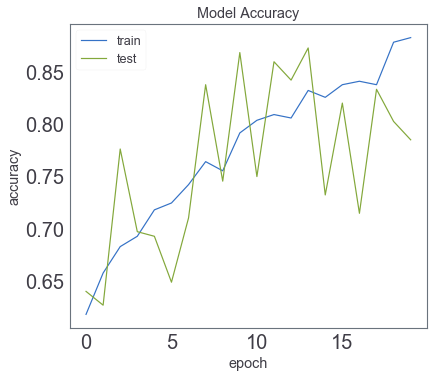

In [22]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()